# Boston Housing Dataset


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.jpg" width=1000>

The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

BLACK = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

MEDV = PRICE median value of owner-occupied homes in $1000s

** PRICE is the TARGET variable **

In [1]:
# crim nessuno vuole vivere nei ghetti dei criminali
# varialtri parametri
# DIS distanza dalle prime fabbriche
# RAD distanza da superstrada
# numero insegnanti elevato
# BLACK numero dei neri (controverso) stato tolto


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def split_dataset(df_corr , target:str = 'PRICE' ):
    X = df_corr.drop(columns=[target]) # is a Matrix
    y = df_corr[target]
    print(X.head(preview_window))
    return X,y


def get_correlated_feature(corrdata, threshold):
    """Toglie variabili sotto soglia"""
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    corr_value = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    print(corr_value.T)
    print(corr_value.index.values)
    df_corr = corrdata[corr_value.index]
    print(df_corr.head(preview_window))
    print(df_corr.shape)
    if __plot__:
        sns.pairplot(df_corr)
        plt.tight_layout()
        plt.show()

    # iniziamo a vedere gli outlier da vedere se il dominio ha senso
    sns.heatmap(df_corr.corr(), annot=True, annot_kws={'size': 12});
    plt.show()
    print(df_corr.columns.T)
    return corr_value


def performance_metrics(features, th, y_true, y_pred):
    """a variare del range di correlazione mi calcoli il benchmark per capire """
    n = len(y_true)
    p = len(features) - 1  # excluding the intercept

    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)

    total_features.append(len(features) - 1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(round(r2,2))
    r2_adjusted_scores.append(round(adj_r2,2))
    mae_values.append(round(mae,2))
    mse_values.append(round(mse,2))
    rmse_values.append(round(rmse,2))

    metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value,
                                           r2_scores, r2_adjusted_scores, mae_values, mse_values, rmse_values],
                                     index=['features name', '#feature', 'corr_value', 'R2', 'R2_adjusted', 'MAE', 'MSE', 'RMSE'])
    print('Performance Metrics')
    print(metrics_dataframe.T)
    
def verifica_metriche(y_test,y_pred):
    from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    ad_r2score = 1-(1-r2)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

    print(f'R2 score {r2}')
    print(f'MSE score {mse}')
    print(f'MAE score {mae}')
    print(f'RMSE score {rmse}') # Alto perchè il nostro modello sbaglia di 
                                # molto perchè abbiamo preso tutto il dataset, 
                                # forse abbiamo preso troppe variabili, anche variabili di "disturbo" 
    print('Adjusted_R2_score: ', ad_r2score)

preview dataset
Data preview
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  PRICE  
0  396.9   4.98   24.0  
1  396.9   9.14   21.6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 

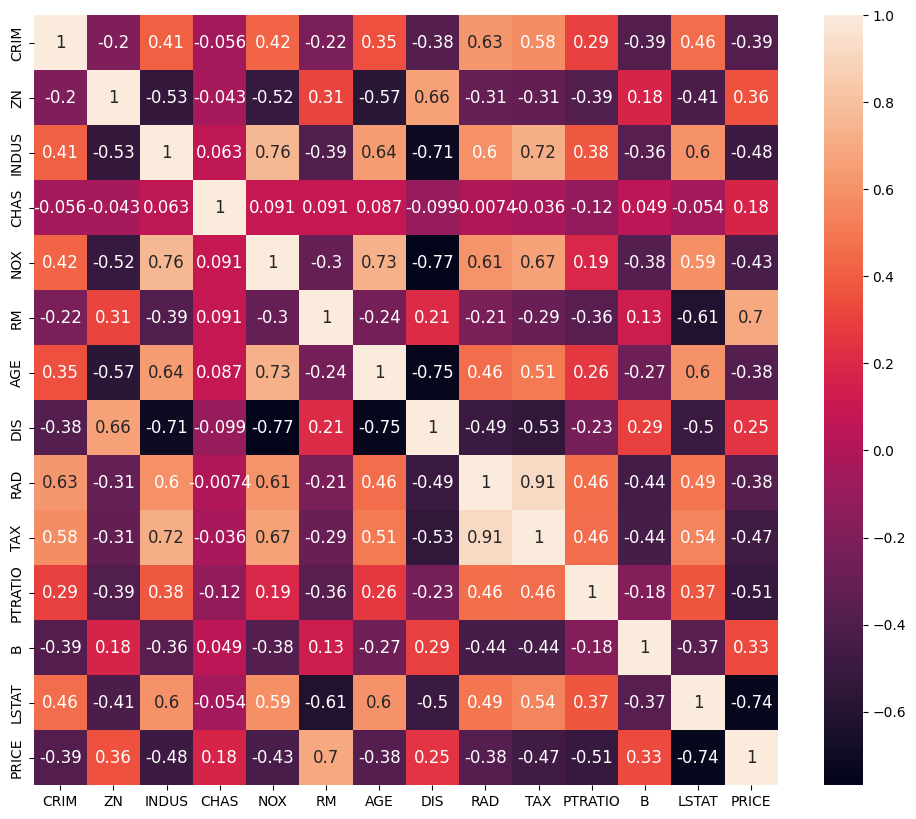

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'PRICE']


In [2]:


url='https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv'
path="03-boston_houses.csv"

__plot__=False # per alleggerire il NB

print("preview dataset")
preview_window=2
df = pd.read_csv(path)

df.rename(columns={'MEDV': 'PRICE'}, inplace=True) #preview

print("Data preview")
print(df.head(preview_window))
print(df.info())
print(df.describe().T)
print('')
print(df.isnull().sum())


if __plot__:
    print("Pairplot")
    sns.pairplot(df,hue='AGE' , height=2);
    plt.show()


print("Correlation analisys")
corrmat = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});
plt.show()

print(corrmat.index.values)


# Data Visualization

CREARE VARIABILI CATEGORICHE PER VARIABILI CONTINUE E VISUALIZZARLE

AGE_category
New         147
Old         149
Very_Old    210
dtype: int64
Violinplot categorie Age


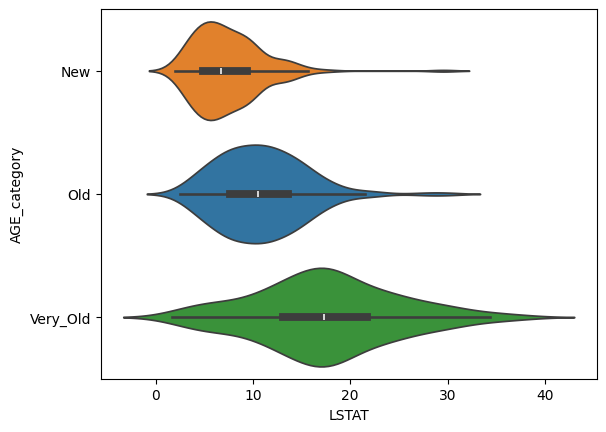

Fine esperimento


In [3]:
df_cat=df.copy() # applichiamo copia per poter manipolare il dataframe

def get_age_category(x):
    """Categorizza in base alla legge dell'occupante per disinguere"""
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very_Old'

df_cat['AGE_category'] = df_cat.AGE.apply(get_age_category) # applicata a tutte le colonne (l'argomento sarà cella per celle della series AGE)

# attn.ne alle variabili e ai filtri
print(df_cat.groupby('AGE_category').size()) # conta le classi delle mie categorie per capire il bilanciamento della mia categorizzazione

print("Violinplot categorie Age")
sns.violinplot(x='LSTAT', y='AGE_category', data=df_cat, order=['New', 'Old','Very_Old'],hue='AGE_category');
plt.show()

if __plot__:
    print("Pairplot Age category manual handled")
    sns.pairplot(df_cat, hue='AGE_category',hue_order=['New', 'Old','Very_Old']); # pariplot con classi in base 
    plt.show()


print('Fine esperimento')

In [4]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]



def viz(df, types):
    """funzione per distinguere le distribuzioni quando abbiamo numerosità elevata di plot"""
    f = pd.melt(df, value_vars=df)
    g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
    g.map(types, "value", kde=True if types == sns.histplot else False)
    plt.show()
    return g

# histogram visualization
if __plot__:
    print('Plot using histplot')
    viz(df[num_col], sns.histplot) ; # avoid 


if __plot__:
    print('Plot using KLIB')
    import klib
    klib.dist_plot(df)
    plt.show()
    print('Plot using dfSummary')
    from summarytools import dfSummary
    dfSummary(data)

## Regressione con tutte le Features

In [5]:
## step 0 capire problema e impostare un dataset definito plottando qualche variabile

## STEP1 DEFINIZIONE DI INPUT E OUTPUT
print('STEP1 DEFINIZIONE DI INPUT E OUTPUT')

X,y=split_dataset(df,'PRICE')


print('STEP2 TRAIN TEST SPLIT')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=667, )

print('STEP3 MODELLAZIONE')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('STEP4 PREDIZIONE')
y_pred = model.predict(X_test)

print('STEP5 VERIFICA METRICHE')
verifica_metriche(y_test,y_pred)


STEP1 DEFINIZIONE DI INPUT E OUTPUT
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  
0  396.9   4.98  
1  396.9   9.14  
STEP2 TRAIN TEST SPLIT
STEP3 MODELLAZIONE
STEP4 PREDIZIONE
STEP5 VERIFICA METRICHE
R2 score 0.6113097827490284
MSE score 34.485513964839186
MAE score 3.683772031811659
RMSE score 5.872436799561081
Adjusted_R2_score:  0.574694037645676


### Feature Selection with correlation

#### threshold 0.4

In [6]:
# Prendi la colonna PRICE del dataframe data, applica la treshold e includi in questo dataframe le features
threshold = 0.40
corr_value = get_correlated_feature(corrmat['PRICE'], threshold)


print('Shuffle and Split Data')
from sklearn.model_selection import train_test_split # rempre sempre
from sklearn.linear_model import LinearRegression  # problema di regressione
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667 )

print((X_train.shape, X_test.shape))

model = LinearRegression()
from IPython.display import display

display(model.fit(X_train, y_train))

print('Try model prediction')
y_pred = model.predict(X_test)


print('Try model prediction')
df_app = pd.DataFrame(data = [y_pred, y_test])
df_app = df_app.T
df_app.columns = ['predetti', 'reali_test']
print(df_app.head(preview_window))



print('Plot predizioni')
length = y_pred.shape[0] #
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);
plt.show()


print('Metriche')

from sklearn.metrics import r2_score

print('STEP5 VERIFICA METRICHE')
verifica_metriche(y_test,y_pred)


               INDUS       NOX       RM       TAX   PTRATIO     LSTAT  PRICE
Corr Value -0.483725 -0.427321  0.69536 -0.468536 -0.507787 -0.737663    1.0
['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'PRICE']
INDUS   -0.483725
NOX     -0.427321
Name: PRICE, dtype: float64
(7,)


TypeError: Series.corr() missing 1 required positional argument: 'other'

### Let's find out other combination of columns to get better accuracy  > 0.50

In [ ]:
threshold = 0.50
corr_value = get_correlated_feature(corrmat['PRICE'], threshold)
print(corr_value.T)

##2
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
r2_adjusted_scores = []
mae_values = []
mse_values = []
rmse_values = []


performance_metrics(df_corr.columns.values, threshold, y_test, y_pred)


print('regression plot of the features correlated with the PRICE')

rows = 3
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

col = df_corr.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = df_corr[col[index]], y = df_corr['PRICE'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()
plt.show()



### Let's find out other combination of columns to get better accuracy >60%

In [ ]:
threshold = 0.60
corr_value = get_correlated_feature(corrmat['PRICE'], threshold)
print(corr_value.T)
df_corr = df[corr_value.index]
print(df_corr.head(preview_window))

##3

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['PRICE'], axis = 1)
    y = corr_data['PRICE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred,y_test

y_pred,y_test = get_y_predict(df_corr)

performance_metrics(df_corr.columns.values, threshold, y_test, y_pred)


corr_value = get_correlated_feature(corrmat['PRICE'], threshold)
print(corr_value.T)


### Let's find out other combination of columns to get better accuracy  >70%

In [ ]:
threshold = 0.70
corr_value = get_correlated_feature(corrmat['PRICE'], threshold)
print(corr_value.T)

df_corr = df[corr_value.index]
print(df_corr.head(preview_window))

y_pred,y_test = get_y_predict(df_corr)
performance_metrics(df_corr.columns.values, threshold, y_test, y_pred)




### Let's find out other combination of columns to get better accuracy >80%

In [ ]:
threshold = 0.80
corr_value = get_correlated_feature(corrmat['PRICE'], threshold)
print(corr_value.T)

df_corr = df[corr_value.index]
print(df_corr.head(preview_window))

y_pred,y_test = get_y_predict(df_corr)
performance_metrics(df_corr.columns.values, threshold, y_test, y_pred)

In [ ]:
#y' = b0+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5

In [ ]:
## Best R2_adjusted is with 3 features: 'RM' 'PTRATIO' 'LSTAT'

# Normalization and Standardization

Standardization = Gaussian with zero mean and unit variance.

 Z is rescaled such that any specific z will now be 0 ≤ z ≤ 1, and is done through this formula:


$$ z = \frac {x−min(x)} {max(x)−min(x)}$$

In [ ]:
## Deprecata
# model = LinearRegression(normalize=True)
# model.fit(X_train, y_train)

## Cross Validation

In [ ]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png',width=600,height=300)

In [ ]:
df = pd.read_csv("boston_houses.csv")
## fix the rename with inplace
#data.rename(columns={'oldName1': 'newName1'}, inplace=True)
df.rename(columns={'MEDV': 'PRICE'}, inplace=True) #preview
df

In [ ]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test) #R^2

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5 , scoring='r2')
scores

In [ ]:
np.mean(scores) # porzione dei datappoint è strategica (dato negativo) proprio per natura del dataset

In [ ]:
# quando le prediction sono molto distanti 

In [ ]:
# cosa ci lascia?

# esercizio:
